# 直方图

## 基本原理

直方图（Histogram）是一种常用的数据可视化工具，用于展示数据的分布情况。通过将数据分成若干区间（bins），并统计每个区间中的数据点数目，并以矩形的高度表示频数、频率或密度。直方图能够直观地反映数据的集中趋势、离散程度以及分布形态。


设有一组日收益率数据 $\{r_1, r_2, \ldots, r_n\}$，我们将其划分为 $K$ 个等宽的区间，每个区间的宽度为：

$$
h = \frac{\max(r) - \min(r)}{K}
$$

第 $k$ 个区间为 $[a_k, a_{k+1})$，其频数记为 $f_k$，那么对应的矩形高度就是 $f_k$（或标准化后的频率）。绘图过程中，横轴表示收益率区间，纵轴表示该区间的频数或频率。

In [123]:
# clear all variables
%reset -f 

## 一个简单的例子

为了理解直方图的用途，我们先看一个简单的例子。某学习小组包括 10 名学生，年龄介于 16 岁到 26 岁之间。

In [124]:
import numpy as np

# Generate the age distribution array
ages = np.array([16] + [18] * 4 + [19] * 4 + [26])
print("Generated Ages:", ages)
print("Number of Students:", len(ages))

Generated Ages: [16 18 18 18 18 19 19 19 19 26]
Number of Students: 10


由于数据量很小，细心的读者可能已经算出了每个年龄的学生人数：16 岁 1 人，18 岁 4 人，19 岁 4 人，26 岁 1 人，甚至会列出如下表格：

| 年龄 | 16   | 18   | 19   | 26   |
|------|------|------|------|------|
| 人数 | 1    | 4    | 4    | 1    |

通过这种方式，我们可以清楚地看到每个年龄段的学生人数分布情况。在制作上述表格的过程中，我们其实是对原数据进行了分组统计：将原数据分成四组，进而统计每组的人数。采用图形的方式可以更直观地展示上述信息：

![](https://fig-lianxh.oss-cn-shenzhen.aliyuncs.com/20250510003842.png)

## 频数、频率与密度

**频数**（Frequency）是指在某个区间内观察值的个数。

**频率** 是指该区间内观察值的个数 ($n_k$) 占总观察值个数 ($n$) 的比例。有时也会把「频率」称为「相对频数 (Relative Frequency)」或「占比 (proportion)」，计算公式为：

$$
f_k = \frac{n_k}{n}
$$

显然，频率的总和为 1，即 $\sum_{k=1}^{K} f_k = 1$。

**密度**（Density）是指单位区间内的频率，通常用于归一化处理。密度可以通过以下公式计算：
$$
d_k = \frac{f_k}{h}
$$

其中，$d_k$ 是第 $k$ 个区间的密度，$h$ 是区间宽度。密度的总和不一定为 1，而是满足 $\sum_{k=1}^{K} d_k \cdot h = 1$。对于连续变量，当区间宽度趋近于 0 时，密度函数的极限就是概率密度函数（PDF）。

此外，绘制直方图时，若纵轴是频率，则取值范围为 $[0, 1]$；若纵轴是密度，则取值范围为 $[0, \infty)$ (因为，当 $h$ 趋近于 0 时，$d_k$ 可以趋近于无穷大)。

从三者的定义也可以看出，无论纵轴为频数、频率还是密度，最终的直方图形状是一样的，只是纵轴的数值不同。

In [127]:
# 列表呈现频数、频率和密度

import pandas as pd

# 计算唯一值及其计数
unique, counts = np.unique(ages, return_counts=True)

# 计算频率
frequencies = counts / counts.sum()

# 计算带宽 h
K = 4  # Number of bins
h = (ages.max() - ages.min()) / K
print("Bandwidth (h):", h)

# 计算密度
density = frequencies / h

# 创建一个 DataFrame 包含计数、频率和密度
tabulated_ages = pd.DataFrame({
    "count": counts,
    "frequency": frequencies,
    "density": density
}, index=unique)

# 显示更新后的表格
print(tabulated_ages)

Bandwidth (h): 2.5
    count  frequency  density
16      1        0.1     0.04
18      4        0.4     0.16
19      4        0.4     0.16
26      1        0.1     0.04


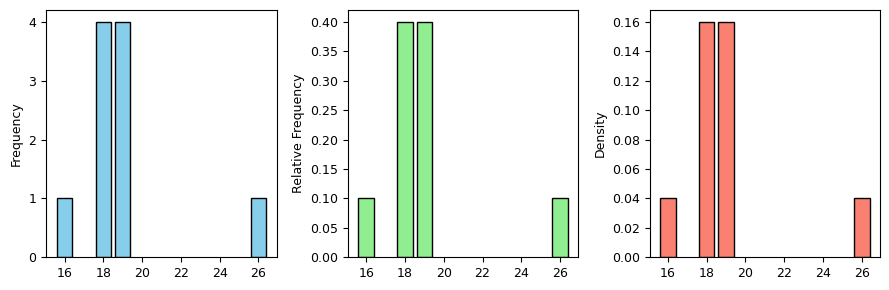

In [135]:
import matplotlib.pyplot as plt
import numpy as np

# 绘制图形
fig, axes = plt.subplots(1, 3, figsize=(9, 3))

# 子图 1: 频数分布柱状图
axes[0].bar(unique, counts, color='skyblue', edgecolor='black')
axes[0].set_ylabel('Frequency')
axes[0].set_yticks(range(max(counts) + 1))

# 子图 2: 频率分布柱状图
axes[1].bar(unique, frequencies, color='lightgreen', edgecolor='black')
axes[1].set_ylabel('Relative Frequency')

# 子图 3: 密度分布柱状图
axes[2].bar(unique, density, color='salmon', edgecolor='black')
axes[2].set_ylabel('Density')

plt.tight_layout()
plt.show()

## 直方图的绘制

简单而言，绘制直方图的基本步骤为：

1. **选择区间数**：根据数据的范围和分布情况，选择合适的区间数 $K$。
2. **计算区间宽度**：根据数据的最大值和最小值，计算每个区间的宽度 $h$。
3. **统计频数**：统计每个区间内的数据点数量，得到频数 $f_k$。
4. **绘制直方图**：使用绘图工具将频数、频率或密度绘制成直方图，横轴表示区间，纵轴表示频数、频率或密度。

下面做详细介绍。

假设我们有一组数据 $\{x_1, x_2, \ldots, x_N\}$，绘制直方图的主要步骤如下：
>**Step 1：** 确定区间总数（K）

将数据划分为 $K$ 个区间。常见的选择区间总数的方法有：

- **经验法则**：通常取 $K = 10$ 或 $K=20$。

- **斯特金斯法则**（Sturges' Rule）
  
  $$K = \lceil \log_2 N + 1 \rceil$$

  其中，$\lceil z \rceil$ 表示对 $z$ 向上取整。

- **费根纳法则**（Freedman-Diaconis Rule）
  
  $$K = \lceil \frac{2 \cdot IQR \cdot N^{-\frac{1}{3}}}{h} \rceil$$
  
  其中，$IQR$ 为四分位距，$h$ 为区间宽度。

- **相机调整法则**（Rice Rule）
  在 Stata 中，区间总数 $K$ 的选取与样本数 $N$ 有关：

  $$K = \min \left\{\sqrt{N}, \frac{10 \ln(N)}{\ln(10)}\right\}$$

  该方法结合平方根法则和对数法则，适用于不同规模的数据集。当 $N<784$ 时，可直接采用 $\sqrt{N}$ 快速计算。

>**Step 2：** 确定区间宽度

区间宽度 $h$ 根据数据的范围和区间总数 $K$ 确定：
$$
h = \frac{\max(x) - \min(x)}{K}
$$

>**Step 3：** 确定区间边界

设数据的最小值为 $x_{\min}$，最大值为 $x_{\max}$，则区间的边界可以表示为：

$$
b_k = x_{\min} + (k-1) \cdot h \quad \text{for } k = 1, 2, \ldots, K+1
$$

每个区间为 $[b_k, b_{k+1})$，最后一个区间为 $[b_K, b_{K+1}]$。

>**Step 4：** 统计每个区间的观察值个数

统计每个区间内的观察值个数，即每个区间的频数 $f_k$：

$$
f_k = \sum_{j=1}^{N} I(b_k \leq x_j < b_{k+1}) \quad \text{for } k = 1, 2, \ldots, K
$$

其中 $I(\cdot)$ 为指示函数，当条件为真时，取值为 $1$，否则取值为 $0$。

>**Step 5：** 绘制直方图

绘制直方图时，将每个区间的频数 $f_k$ 作为柱状图的高度。对于区间 $[b_k, b_{k+1})$，其对应的柱状图高度为 $f_k$，宽度为 $h$。

当然，也可以根据需要用频率或密度来绘制直方图。


## Python 实操

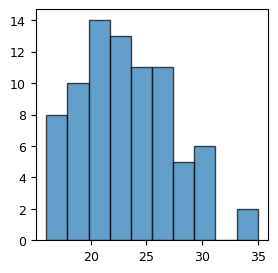

In [137]:
'''
**提示词**
生成 age 变量，取值范围 16-35 岁，N = 100，基本服从正态分布。
然后绘制直方图，并给出解释，尤其是带宽的选择。
'''
import numpy as np
import matplotlib.pyplot as plt

# 生成年龄分布数据
np.random.seed(1234)  # For reproducibility
age = np.random.normal(loc=21, scale=7, size=100).astype(int)
age = age[(age >= 16) & (age <= 35)]  # Restrict values to the range 16-35

# 绘制直方图
plt.figure(figsize=(3, 3))
plt.hist(age, edgecolor='black', alpha=0.7) 
plt.show()

本例中，我们只在 `plt.hist()` 函数中指定了变量名 `age`，而没有指定 `bins` 和 `rwidth` 参数。此时，函数会自动选择合适的区间数量和宽度。根据数据的分布情况，函数会将数据划分为 10 个区间，并计算每个区间内的数据点数量。

我们也可以自行制定 `bins` 和 `rwidth` 参数。如下命令的效果与上面相同：

```python
K = 10                           # Number of bins
h = (age.max() - age.min()) / K  # Bandwidth

# 指定 bins 数量
plt.hist(age, bins=K,   edgecolor='black', alpha=0.7)

# 指定 rwidth
plt.hist(age, rwidth=h, edgecolor='black', alpha=0.7)
```

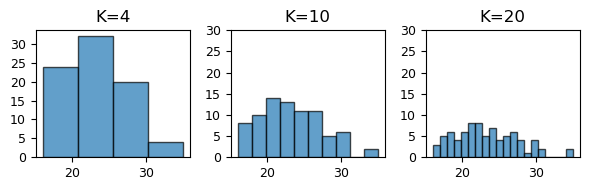

In [139]:
'''Prompt
绘制一行图形，3 个子图，分别设定 K=4, K=10, K=20。
横轴刻度采用图形标题，横轴和纵轴标题等信息，做最基本的图形即可
'''

fig, axes = plt.subplots(1, 3, figsize=(6, 2)) # 3 个子图

K_values = [4, 10, 20]   # 设置三种 K 值

# Plot histograms for each K
for i, K in enumerate(K_values):
    axes[i].hist(age, bins=K, edgecolor='black', alpha=0.7)
    axes[i].set_title(f'K={K}')          # 设置标题
    axes[i].set_yticks(range(0, 32, 5))  # 重要！三个子图的 y 轴刻度一致

plt.tight_layout()
plt.show()

从上图中可以看出：

- 不同的 bins 会导致直方图的分组方式不同，从而影响数据分布的可视化效果。较少的 bins 会导致信息的过度简化，而较多的 bins 则可能使图形过于复杂，难以观察整体趋势。

- 为了增加对比对，我们设定了 `axes[i].set_yticks(range(0, 32, 5))`。可以看出，当我们划分的组数较多时 (`bins` 值较大)，落入每个区间的数据点数量自然会相对变少，导致直方图的高度不均匀，且可能出现一些区间的高度为 0 的情况。因此，过大的 `bins` 值虽然能够提供更精细的分布信息，但也可能导致我们「只见树木，不见森林」。

多数情况下，我们都无需手动指定 `bins` 和 `rwidth` 参数，直接使用 `plt.hist()` 函数自动选择的最优值即可。


### plt.hist() 函数详解

`plt.hist()` 函数是 `matplotlib` 库中用于绘制直方图的函数。其基本语法如下：

```python
plt.hist(x, bins=None, range=None, density=False, 
         weights=None, cumulative=False, bottom=None, 
         histtype='bar', align='mid', orientation='vertical', 
         rwidth=None, 
         color=None, edgecolor=None, alpha=None, 
         label=None, stacked=False, **kwargs)
```

其中，常用参数如下：

- `x`：表示要绘制直方图的数据，可以是列表、数组或 `pandas` 的 `Series` 对象。
- `bins`：表示区间的数量或边界，可以是整数或列表。若为整数，则表示将数据划分为 `bins` 个等宽区间；若为列表，则表示指定每个区间的边界。如 `bins=20`，或 `bins=[-0.1, -0.05, 0, 0.05, 0.1]`
- `density`：布尔值，表示是否将直方图标准化为概率密度（面积为 1）。默认为 `False`。
- `weights`：表示每个数据点的权重，可以是与 `x` 等长的数组。
- `cumulative`：布尔值，表示是否绘制累积直方图。默认为 `False`。
- `bottom`：表示每个柱子的底部位置，可以是与 `x` 等长的数组。
- `histtype`：表示直方图的类型，可以是 `'bar'`、`'step'` 或 `'stepfilled'`。
- `align`：表示柱子的对齐方式，可以是 `'left'`、`'mid'` 或 `'right'`。
- `orientation`：表示柱子的方向，可以是 `'vertical'` 或 `'horizontal'`。
- `rwidth`：表示柱子的宽度，可以是一个浮点数，表示相对于区间宽度的比例。
- `color`：表示柱子的颜色，可以是字符串或 RGB 值。
- `edgecolor`：表示柱子的边框颜色。
- `alpha`：表示柱子的透明度，可以是一个浮点数，范围在 0 到 1 之间。
- `label`：表示图例标签。
- `stacked`：布尔值，表示是否堆叠直方图。默认为 `False`。
- `kwargs`：其他参数，可以传递给 `matplotlib` 的绘图函数，例如 `figsize=(10, 6)`。

## 注意事项

在比较直方图时，为了便于观察差异，建议将直方图垂直排列，以便更直观地观察横向变化。例如，尝试比较图中顶部的两个直方图。若将两个直方图水平排列，通常会因横向偏移而难以识别它们之间的差异。

![直方图对比示例](https://fig-lianxh.oss-cn-shenzhen.aliyuncs.com/20250508000119.png)

> 图：当排列直方图以便于比较时，建议垂直对齐以观察横向变化。


## 扩展阅读

### 直方图实例

This Python code creates a **histogram** using the [Matplotlib](https://python-graph-gallery.com/matplotlib/) library to visualize data about *salaries in France*. It was originally produced by the [INSEE](https://www.insee.fr/fr/accueil).

<img style="width: 500px" src="https://fig-lianxh.oss-cn-shenzhen.aliyuncs.com/20250511114743.png">

> Source: [Histogram with custom style and annotations](https://python-graph-gallery.com/web-histogram-with-annotations/)

### Python 
- [matplotlib - Histogram bins, density, and weight](https://matplotlib.org/stable/gallery/statistics/histogram_normalization.html)。详细介绍了 bins 的选择对直方图形状的影响，以及密度的概念。 
- [Scatter plot with histograms](https://matplotlib.org/stable/gallery/lines_bars_and_markers/scatter_hist.html#sphx-glr-gallery-lines-bars-and-markers-scatter-hist-py)
- [seaborn - distribution](https://seaborn.pydata.org/tutorial/distributions.html)

### Stata

  - [万莉](https://www.lianxh.cn/search.html?s=万莉), 2020, [Stata绘图全解：绘图语法-条形图-箱型图-散点图-矩阵图-直方图-点图-饼图](https://www.lianxh.cn/details/34.html), 连享会 No.34.
  - [万莉](https://www.lianxh.cn/search.html?s=万莉), 2020, [Stata：读懂直方图](https://www.lianxh.cn/details/479.html), 连享会 No.479.
  - [刘欣妍](https://www.lianxh.cn/search.html?s=刘欣妍), [史柯](https://www.lianxh.cn/search.html?s=史柯), 2022, [Stata：描述性统计分析新命令-dstat](https://www.lianxh.cn/details/926.html), 连享会 No.926.
  - [孙晓艺](https://www.lianxh.cn/search.html?s=孙晓艺), 2024, [Stata绘图大礼包：27个常用的可视化范例及代码](https://www.lianxh.cn/details/1372.html), 连享会 No.1372.
  - [汪京](https://www.lianxh.cn/search.html?s=汪京), 2024, [multihistogram-多变量直方图](https://www.lianxh.cn/details/1457.html), 连享会 No.1457.
  - [袁子晴](https://www.lianxh.cn/search.html?s=袁子晴), 2021, [史上最牛Stata绘图模板-schemepack：酷似R中的ggplot2](https://www.lianxh.cn/details/819.html), 连享会 No.819.
  - [谢嘉伟](https://www.lianxh.cn/search.html?s=谢嘉伟), 2024, [Stata 绘图：binscatterhist-分仓散点图+直方图](https://www.lianxh.cn/details/1506.html), 连享会 No.1506.
  - [郑宇](https://www.lianxh.cn/search.html?s=郑宇), 2024, [Stata绘图：加权直方图](https://www.lianxh.cn/details/1425.html), 连享会 No.1425.
